In [35]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pytorchvideo.data.encoded_video import EncodedVideo
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim

%run objects
%run models

In [36]:
train_dataset = ContactDataset("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_labels.csv",
                      ground=False, feature_size=256, num_back_forward_steps=1, skips=1)

0
        game_play  game_key  play_id     view                     video  \
129  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   
138  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   
384  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   
387  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   
645  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   
646  58168_003392     58168     3392  Endzone  58168_003392_Endzone.mp4   

     frame  nfl_player_id player_label  left  width  top  height  
129    293          43854          V57   117     25  278      20  
138    293          38590          H70   809     24  292      34  
384    299          38590          H70   809     24  288      34  
387    299          43854          V57   122     25  277      21  
645    305          43854          V57   125     24  279      22  
646    305          38590          H70   804     25  277      34  
(60

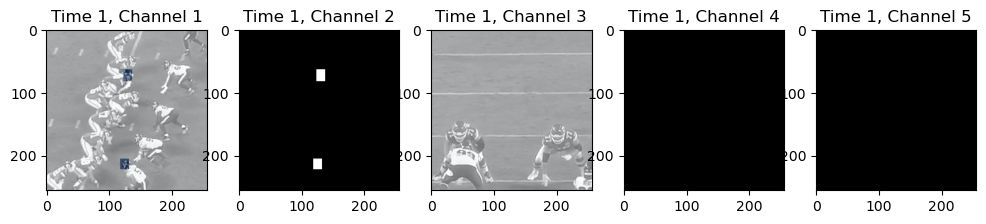

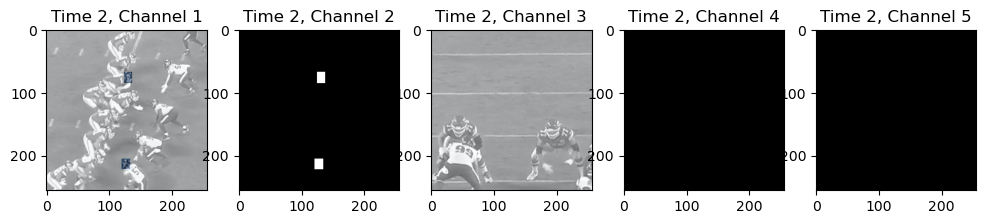

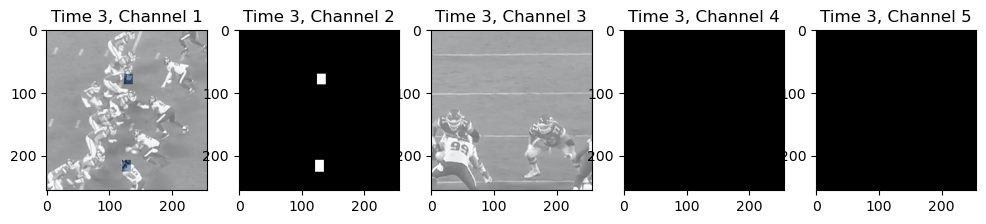

In [37]:
images=train_dataset[0]
j = 0
for image in images[0]:
    j+=1
    fig, axs = plt.subplots(1, 5, figsize=(12, 4)) 
    for i in range(5):
        channel = image[:, :, i]
        axs[i].imshow(channel, cmap='gray') 
        if i==0 or i==2:
            axs[i].imshow(image[:, :, i+1], alpha=0.4, cmap='Blues')  
        axs[i].set_title(f'Time {j}, Channel {i+1}')

In [38]:
dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)

In [39]:
image_size = 128
input_size = 100  # Output size of the Encoder's fully connected layer
hidden_size = 64
num_layers = 2
dropout = 0.1
learning_rate = 0.001
num_epochs = 10

In [40]:
combined_model = ContactNet(image_size, input_size, hidden_size, num_layers, dropout)
device = torch.device('cpu')
combined_model.to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(combined_model.parameters(), lr=learning_rate)

In [10]:
for epoch in range(num_epochs):
    # Training loop
    combined_model.train()
    for batch_idx, (features, labels) in enumerate(dataloader):
        print("Got here")
        x1, x2, x3, x4, x5 = features
        print(x1.shape)
        print(labels)
        break
        # Forward pass
        outputs = combined_model(x1, x2, x3, x4, x5)
        loss = criterion(outputs.squeeze(), labels.float())  # Compute loss
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

1551050


1402465
1402465
-----
Player 2 not in side view.
1402465
-----
Player 2 not in end view.
235547
2931056
2931056
-----
Player 1 not in side view.
721996
721996
-----
Player 1 not in side view.


IndexError: Missing frames from steps specified. Try reducing step size if possible.

In [81]:
helmet = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_baseline_helmets.csv")
train_info = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_labels.csv")
tracking = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_player_tracking.csv")
train_info['frame'] = list(map(step_to_frame, train_info.step))

In [85]:
train_info.loc[train_info.contact==1]

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,frame
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1,317
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1,323
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1,323
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1,329
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1,329
...,...,...,...,...,...,...,...,...
4720589,58582_003121_87_39971_G,58582_003121,2021-10-12T02:42:28.700Z,87,39971,G,1,821
4720842,58582_003121_88_39971_G,58582_003121,2021-10-12T02:42:28.800Z,88,39971,G,1,827
4721095,58582_003121_89_39971_G,58582_003121,2021-10-12T02:42:28.900Z,89,39971,G,1,833
4721348,58582_003121_90_39971_G,58582_003121,2021-10-12T02:42:29.000Z,90,39971,G,1,839


In [85]:
[(1,2)] * 5

[(1, 2), (1, 2), (1, 2), (1, 2), (1, 2)]